In [1]:
# check version
from pycaret.utils import version
version()

'2.3.6'

In [2]:
import pandas as pd
df = pd.read_csv("spam_features.csv")
df.drop(['content'], axis = 1, inplace = True)
print(df.dtypes)
df.head()

label        object
length        int64
num_tel       int64
ratio_UC    float64
URL           int64
free          int64
call          int64
txt           int64
text          int64
claim         int64
mobile        int64
stop          int64
reply         int64
sex           int64
dtype: object


,label,length,num_tel,ratio_UC,URL,free,call,txt,text,claim,mobile,stop,reply,sex
0,ham,111,0,0.0361,0,0,0,0,0,0,0,0,0,0
1,ham,29,0,0.1111,0,0,0,0,0,0,0,0,0,0
2,spam,155,3,0.1031,0,1,0,1,1,0,0,0,0,0
3,ham,49,0,0.0606,0,0,0,0,0,0,0,0,0,0
4,ham,61,0,0.0426,0,0,0,0,0,0,0,0,0,0


In [4]:
from pycaret.classification import *
clf1 = setup(data = df, target = "label",
             session_id = 42,
             numeric_features = ['length', 'num_tel',  'ratio_UC',
                                 'URL', 'free', 'txt', 'text', 'call',
                                'claim', 'mobile', 'stop', 'reply', 'sex'])

,Description,Value
0,session_id,42
1,Target,label
2,Target Type,Binary
3,Label Encoded,"ham: 0, spam: 1"
4,Original Data,"(5169, 14)"
5,Missing Values,0
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9834,0.9798,0.8985,0.9614,0.9284,0.9190,0.9200,0.5150
gbc,Gradient Boosting Classifier,0.9826,0.9794,0.8894,0.9637,0.9242,0.9144,0.9159,0.0320
rf,Random Forest Classifier,0.9820,0.9710,0.8940,0.9538,0.9223,0.9121,0.9132,0.0680
lightgbm,Light Gradient Boosting Machine,0.9812,0.9720,0.8848,0.9560,0.9182,0.9076,0.9090,0.0670
xgboost,Extreme Gradient Boosting,0.9807,0.9707,0.8846,0.9524,0.9165,0.9056,0.9069,0.1130
ada,Ada Boost Classifier,0.9801,0.9763,0.8732,0.9583,0.9131,0.9019,0.9035,0.0240
et,Extra Trees Classifier,0.9782,0.9679,0.8939,0.9239,0.9079,0.8955,0.8962,0.0630
lr,Logistic Regression,0.9776,0.9773,0.8501,0.9596,0.9009,0.8884,0.8908,0.6380
dt,Decision Tree Classifier,0.9735,0.9341,0.8825,0.8952,0.8885,0.8735,0.8736,0.0040
lda,Linear Discriminant Analysis,0.9735,0.9765,0.8039,0.9694,0.8786,0.8638,0.8688,0.0050


In [74]:
model_gbc = create_model('gbc')
tuned_gbc = tune_model(model_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9807,0.9696,0.8837,0.9500,0.9157,0.9048,0.9055
1,0.9834,0.9678,0.8605,1.0000,0.9250,0.9157,0.9190
2,0.9890,0.9798,0.9535,0.9535,0.9535,0.9472,0.9472
3,0.9779,0.9917,0.8837,0.9268,0.9048,0.8923,0.8926
4,0.9834,0.9647,0.8605,1.0000,0.9250,0.9157,0.9190
5,0.9890,0.9865,0.9091,1.0000,0.9524,0.9461,0.9475
6,0.9807,0.9820,0.8636,0.9744,0.9157,0.9048,0.9069
7,0.9779,0.9745,0.8864,0.9286,0.9070,0.8944,0.8948
8,0.9834,0.9856,0.9302,0.9302,0.9302,0.9208,0.9208
9,0.9889,0.9970,0.9302,0.9756,0.9524,0.9461,0.9465


In [75]:
tuned_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=6,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0002,
                           min_impurity_split=None, min_samples_leaf=3,
                           min_samples_split=5, min_weight_fraction_leaf=0.0,
                           n_estimators=120, n_iter_no_change=None,
                           presort='deprecated', random_state=42,
                           subsample=0.65, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)

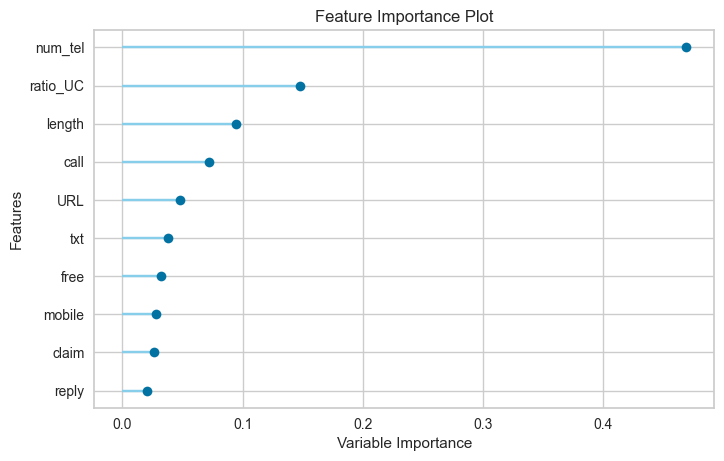

In [76]:
plot_model(tuned_gbc, plot = 'feature')

In [6]:
model_cat = create_model('catboost')
tuned_cat = tune_model(model_cat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9779,0.9610,0.8837,0.9268,0.9048,0.8923,0.8926
1,0.9834,0.9724,0.8605,1.0000,0.9250,0.9157,0.9190
2,0.9779,0.9728,0.8605,0.9487,0.9024,0.8900,0.8914
3,0.9751,0.9842,0.8605,0.9250,0.8916,0.8775,0.8783
4,0.9834,0.9625,0.8605,1.0000,0.9250,0.9157,0.9190
5,0.9862,0.9863,0.8864,1.0000,0.9398,0.9320,0.9342
6,0.9779,0.9886,0.8409,0.9737,0.9024,0.8901,0.8931
7,0.9751,0.9836,0.8636,0.9268,0.8941,0.8801,0.8808
8,0.9834,0.9860,0.9302,0.9302,0.9302,0.9208,0.9208
9,0.9917,0.9973,0.9302,1.0000,0.9639,0.9592,0.9600


In [7]:
tuned_cat

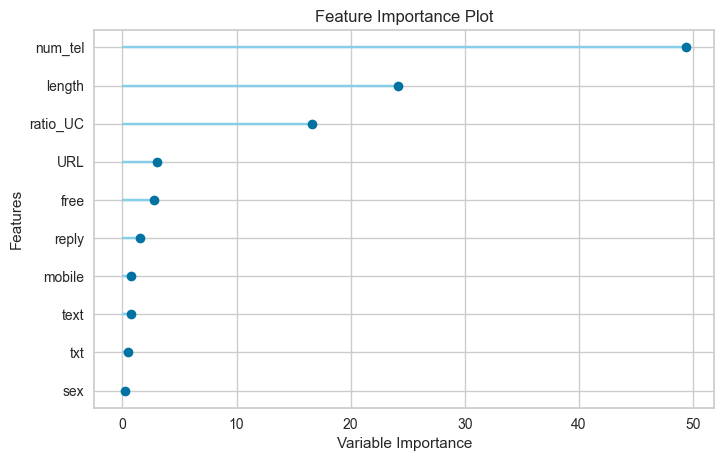

In [8]:
plot_model(tuned_cat,  plot = 'feature')

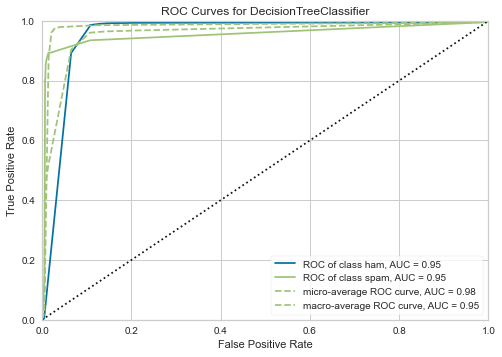

In [16]:
plot_model(tuned_model, plot = 'auc')

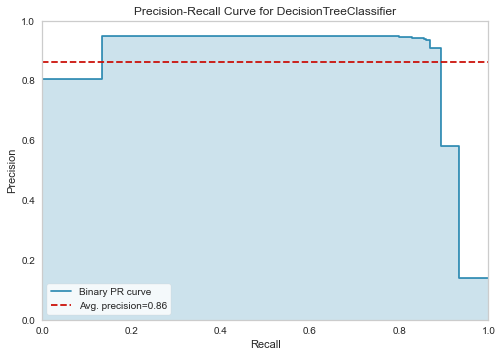

In [15]:
plot_model(tuned_model, plot = 'pr')